## Preprocessing for Neural Network Model

In [98]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

#  Import and read the charity_data.csv.
import pandas as pd 
# Use the preprocessed data files
hp_train_data_path = "../Preprocessed_Data/preprocessed_hp_train.csv"
hp_test_data_path = "../Preprocessed_Data/preprocessed_hp_test.csv"


# Read the House Prices Train & Test data 
hp_train_df = pd.read_csv(hp_train_data_path)
hp_test_df = pd.read_csv(hp_test_data_path)

In [99]:
#Display the House Prices Train DataFrame
hp_train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,Other,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,Other,Other,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,Other,RL,60,Other,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,Other,Other,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [102]:
hp_train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [103]:
hp_train_df.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [114]:
hp_train_df.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [116]:
hp_train_df[hp_train_df.YrSold==2010]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
16,17,20,RL,73,Other,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,Other,Other,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,5,2010,WD,Normal,154000
26,27,20,RL,60,7200,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2010,WD,Normal,134800
27,28,20,RL,Other,Other,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2010,WD,Normal,306000
33,34,20,RL,70,Other,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,165500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1439,20,RM,Other,Other,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,4,2010,WD,Normal,149700
1446,1447,20,RL,73,Other,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,157900
1456,1457,20,RL,Other,Other,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,Other,RL,Other,Other,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500


<Axes: xlabel='Neighborhood'>

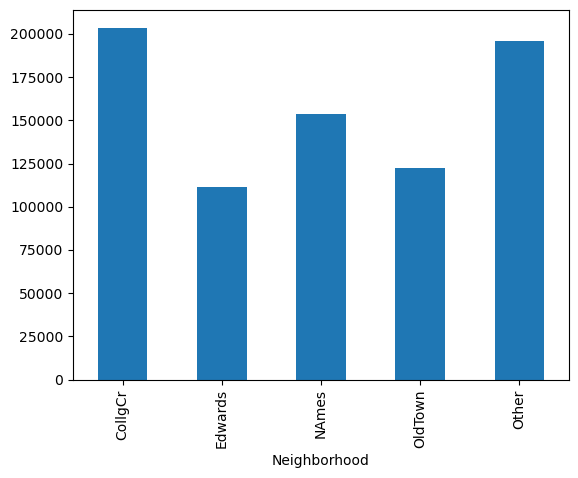

In [125]:
hp_train_df[hp_train_df.YrSold==2010].groupby(['Neighborhood'])['SalePrice'].mean().plot(kind='bar')

In [4]:
#Display the House Prices Test  DataFrame
hp_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [5]:
# Review the columns name
hp_train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [6]:
# Drop the non-beneficial ID columns.
hp_train_df = hp_train_df.drop(columns=['Id'], axis=1)
hp_train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
# Determine the number of unique values in each column.
hp_train_df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 75, dtype: int64

In [8]:
# # Look at value counts for binning
# hp_train_df['YearBuilt'].value_counts()

In [9]:
# # Choose a cutoff value and create a list of application types to be replaced
# # use the variable name `application_types_to_replace`
# cutoff_value = 500 

# # Get the counts of each application type
# application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# # Identify application types to be replaced
# application_types_to_replace = list(application_type_counts[application_type_counts < cutoff_value].index)

# # Replace in the DataFrame
# for app in application_types_to_replace:
#     application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, 'Other')

# # Check to make sure binning was successful
# print(application_df['APPLICATION_TYPE'].value_counts())


In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
hp_train_df = pd.get_dummies(hp_train_df)
hp_test_df = pd.get_dummies(hp_test_df)

# Display the encoded DataFrame
hp_train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


## Split to Prepare the data 

In [11]:
# Split our preprocessed data into our features and target arrays
# As 'SalePrice' is your target variable
X = hp_train_df.drop('SalePrice', axis=1)
y = hp_train_df['SalePrice']

 
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [37]:
# Determine the number of input features
input_features = len( X_train_scaled[0])   #X_train.shape[1] 

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=input_features, activation='relu'))

# Fist hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Check the structure of the model
nn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                21680     
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 24141 (94.30 KB)
Trainable params: 24141 (94.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# Compile the model
# Use mean_squared_error for regression
nn.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])


In [39]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50)

Epoch 1/50
37/37 [==============================] - 2s 5ms/step - loss: 176496.8750 - mae: 176496.8750
Epoch 2/50
37/37 [==============================] - 0s 5ms/step - loss: 155865.5000 - mae: 155865.5000
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 101434.2109 - mae: 101434.2109
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 50656.1758 - mae: 50656.1758
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 47151.8750 - mae: 47151.8750
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 45877.0039 - mae: 45877.0039
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 44411.2070 - mae: 44411.2070
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 42777.0859 - mae: 42777.0859
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 41179.1523 - mae: 41179.1523
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 39452.2227 -

In [40]:
nn.evaluate(X_test_scaled,y_test,verbose=2)

10/10 - 0s - loss: 177738.6406 - mae: 177738.6406 - 365ms/epoch - 36ms/step


[177738.640625, 177738.640625]

In [41]:
# Evaluate the model using the test data
model_loss, mean_squared_error = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, mean_squared_error: {mean_squared_error}")

10/10 - 0s - loss: 177738.6406 - mae: 177738.6406 - 127ms/epoch - 13ms/step
Loss: 177738.640625, mean_squared_error: 177738.640625


In [42]:
# # Export our model to HDF5 file
# file_path = "House_Price_Predictions.h5"

# # Save the model to an HDF5 file
# nn.save(file_path)

# # Print a success message
# print(f"Model successfully saved to {file_path}")


In [43]:
# Compile the model
# Use mean_squared_error for regression
nn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50)



# Evaluate the model using the test data
model_loss, mean_squared_error = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, mean_squared_error: {mean_squared_error}")

Epoch 1/50
37/37 [==============================] - 2s 4ms/step - loss: 1996738560.0000 - mean_squared_error: 1996738560.0000
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 2004374784.0000 - mean_squared_error: 2004374784.0000
Epoch 3/50
37/37 [==============================] - 0s 5ms/step - loss: 1997348096.0000 - mean_squared_error: 1997348096.0000
Epoch 4/50
37/37 [==============================] - 0s 5ms/step - loss: 1978891776.0000 - mean_squared_error: 1978891776.0000
Epoch 5/50
37/37 [==============================] - 0s 5ms/step - loss: 1976517248.0000 - mean_squared_error: 1976517248.0000
Epoch 6/50
37/37 [==============================] - 0s 6ms/step - loss: 1974634880.0000 - mean_squared_error: 1974634880.0000
Epoch 7/50
37/37 [==============================] - 0s 5ms/step - loss: 1974396288.0000 - mean_squared_error: 1974396288.0000
Epoch 8/50
37/37 [==============================] - 0s 5ms/step - loss: 2008312576.0000 - mean_squared_error: 20083125

In [44]:
# Compile the model
# Use mean_squared_error for regression
# nn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])


nn.compile(optimizer='adam', loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError(),'mae'])


# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50)



# Evaluate the model using the test data
model_loss, rmse, mae = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, rmse: {rmse}  mae :   {mae} "  )

Epoch 1/50
37/37 [==============================] - 2s 5ms/step - loss: 1825598464.0000 - root_mean_squared_error: 42727.0234 - mae: 26109.7383
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 1823126528.0000 - root_mean_squared_error: 42698.0859 - mae: 26269.5664
Epoch 3/50
37/37 [==============================] - 0s 5ms/step - loss: 1809061760.0000 - root_mean_squared_error: 42533.0664 - mae: 25885.4766
Epoch 4/50
37/37 [==============================] - 0s 5ms/step - loss: 1777158272.0000 - root_mean_squared_error: 42156.3555 - mae: 25712.6230
Epoch 5/50
37/37 [==============================] - 0s 5ms/step - loss: 1783842176.0000 - root_mean_squared_error: 42235.5547 - mae: 25854.1211
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 1850672128.0000 - root_mean_squared_error: 43019.4375 - mae: 27051.6602
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 1776710272.0000 - root_mean_squared_error: 42151.0430 - mae: 257

In [55]:
y_predict = nn.predict(X_test)
y_predict_list = [ i[0] for i  in  y_predict.tolist() ]
y_predict_list
#y_test = hp_train_df['SalePrice'] #.values.reshape(-1, 1)

#y_test.reshape(-1, 1)
pred=pd.DataFrame( {"Actual": y_test,   "Predicted": y_predict_list , "delta" : abs(y_test - y_predict_list) })



10/10 [==============================] - 0s 3ms/step


In [85]:
import matplotlib.pyplot as plt


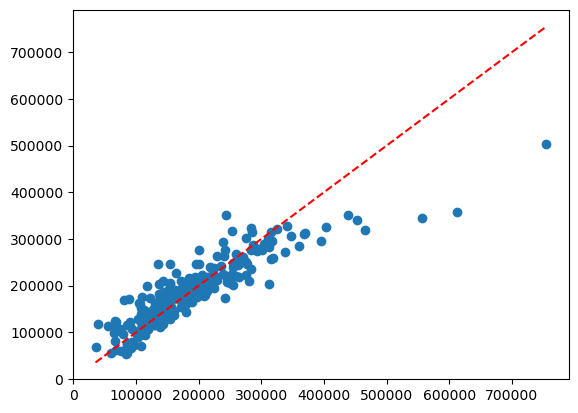

In [77]:
plt.scatter(pred['Actual'],pred['Predicted'])
plt.plot([pred['Actual'].min(),pred['Actual'].max()],
        [pred['Actual'].min(),pred['Actual'].max()],'--r')

In [78]:
pred.head(10)

,Actual,Predicted,delta
892,154500,145635.812500,8864.187500
1105,325000,321064.593750,3935.406250
413,115000,117424.015625,2424.015625
522,159000,177049.312500,18049.312500
1036,315500,257772.703125,57727.296875
614,75500,59093.222656,16406.777344
218,311500,203790.968750,107709.031250
1160,146000,153846.687500,7846.687500
649,84500,52405.035156,32094.964844
887,135500,159569.046875,24069.046875


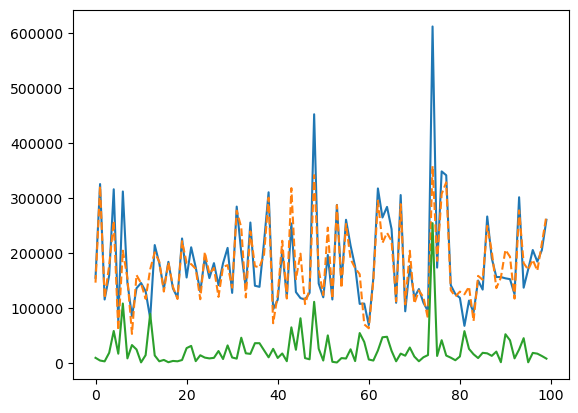

In [89]:
pred1=pred.reset_index().head(100)
plt.plot(pred1.index, pred1.Actual,label='Actual')
plt.plot(pred1.index,pred1.Predicted,label='Predicted',linestyle='--')
plt.plot(pred1.index,pred1.delta,label='Predicted')

In [45]:
# Determine the number of input features
input_features = len( X_train_scaled[0])   #X_train.shape[1] 

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Dense(units=100, input_dim=input_features, activation='relu'))

# Fist hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Check the structure of the model
nn.summary()

# Compile the model
# Use mean_squared_error for regression
# nn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])


nn.compile(optimizer='adam', loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError(),'mae'])


# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50)



# Evaluate the model using the test data
model_loss, rmse, mae = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, rmse: {rmse}  mae :   {mae} "  )


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               27100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 32201 (125.79 KB)
Trainable params: 32201 (125.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
37/37 [==============================] - 2s 4ms/step - loss: 37093056512.0000 - root_mean_squared_error: 192595.5781 - mae: 176882.7188
Epoch 2/50
37/37 [==============================] - 0s 5ms/step - loss: 29347502080.0000 - root_mean_squared_error: 171311.1250 - mae

Loss: 39142277120.0, rmse: 197844.078125  mae :   177968.828125 
